https://github.com/microsoft/textworld

- Playing a game (terminal)
- tw-play gen_games/tw-game-vjs3cos0-house-GP-OgOJFl9Jtba5I1Rb.ulx

In [1]:
import numpy as np
import textworld
import random
import matplotlib.pyplot as plt
import math

In [2]:
def get_room(desc):
    
    room = ''
    lines = desc
    lines = lines.lower()
    lines = lines.split('\n')
    line = lines[0]
    line = line.strip()
    if "-=" in line and "=-" in line:
        room = line.split(" ")[1]
    
    return room    


def get_command(state,command_list):
    global my_memory,epsilon
    
    if epsilon*100 > random.randint(0,100):
        r = random.randint(0,len(command_list)-1)
        c = command_list[r]
        return c
    else:
        max_reward = -10000
        best_action = ''
        for c in command_list:
            for m in my_memory:
                the_state = m[0]
                the_action = m[1]
                the_reward = m[2]
                if the_state == state and the_action == c and the_reward > max_reward  :
                    best_action = the_action
                    max_reward = the_reward

        if len(best_action) > 0:
            return best_action
        else:
            r = random.randint(0,len(command_list)-1)
            c = command_list[r]
            return c


def get_good_command(state,command_list):
    
    good_command = []
    for c in command_list:
        if 'insert' in c or 'take' in c or 'go' in c:
        #if 'insert' in c or 'take' in c or 'go' in c or 'open' in c:
        #if 'drop' not in c and 'examine' not in c and 'close' not in c:
        #if 'examine' not in c:
            good_command.append(c)

    return get_command(state,good_command)


def update_memory(state,action,reward):
    global my_memory,alpha
    
    has_update = False
    for r in my_memory:
        if r[0] == state and r[1] == action:
            r[2] = (1-alpha)*r[2] + alpha*reward
            #print(r)
            has_update = True
            break
    
    if has_update == False:
        my_memory.append([state,action,reward])
    

In [3]:
my_memory = []
results = []
exploration_factor = []

alpha = 0.5
epsilon = 1.0
step_total = 1000

#rooms = ['scullery', 'attic', 'bedchamber', 'pantry', 'vault']
#actions = ['take formless keycard', 'go east', 'insert passkey into locker', 'take passkey from locker', 'go west', 'insert formless keycard into locker', 'take formless keycard from locker', 'go south', 'insert cloak into toolbox', 'take key from toolbox', 'insert keycard into toolbox', 'go north', 'insert lampshade into locker', 'take lampshade from locker', 'insert formless keycard into toolbox', 'insert lampshade into toolbox', 'take formless keycard from toolbox', 'insert key into toolbox', 'take cloak from toolbox', 'take keycard from toolbox', 'insert passkey into toolbox', 'insert cloak into locker', 'insert keycard into locker', 'take cloak from locker', 'take passkey from toolbox', 'take lampshade from toolbox', 'take keycard from locker', 'insert key into locker']

#env = textworld.start("gen_games/tw-game-vjs3cos0-house-GP-OgOJFl9Jtba5I1Rb.ulx")
env = textworld.start("gen_games/tw-game-kOheSehN-house-GP-03lsMoGCgWlS1pq.ulx")
agent = textworld.agents.NaiveAgent()  # Or your own `textworld.Agent` subclass.

avg_moves, avg_scores = [], []
N = 30 #10

env.activate_state_tracking()
env.compute_intermediate_reward()
env.enable_extra_info("description")
env.enable_extra_info("inventory")
    
for no_episode in range(N):
    #my_memory.clear()
    
    agent.reset(env)  # Tell the agent a new episode is starting.
    game_state = env.reset()  # Start new episode.
    
    #print(game_state.objective)
    
    reward = 0
    done = False
    
    #epsilon = epsilon - 0.01
    epsilon = 1/math.pow(no_episode+1,2)
    exploration_factor.append(epsilon)
        
    for no_step in range(step_total):
                
        room = get_room(game_state.description)
        c_list = game_state.admissible_commands
        
        command = get_command(room,c_list)
        #command = get_good_command(room,c_list)
        
        game_state, reward, done = env.step(command)
        im_reward = game_state.intermediate_reward
        next_room = get_room(game_state.description)
        
        #print('room:',room)
        #print('command:',command)
        #print('ireward:',game_state.intermediate_reward)
        #print('reward:',reward)
        #print('--------------------')
        
        update_memory(room,command,im_reward)
        
        #可用function
        #print(game_state.admissible_commands)
        #print(game_state.inventory)
        #print(game_state.state) #顯示目前位置(JSON格式)
        #print(game_state.view()) #顯示目前的state
        #print(game_state.description) #目前位置的狀況(房間)
                
        if done:
            print('====== COMPLETED ======')
            print('episode num : ', no_episode+1)
            print('total steps :',no_step+1)
            print(command)
            results.append(no_step)
            break

    # See https://textworld-docs.maluuba.com/textworld.html#textworld.core.GameState
    avg_moves.append(game_state.nb_moves)
    avg_scores.append(game_state.score)

env.close()
print("avg. steps: {:5.1f}; avg. score: {:4.1f} / 1.".format(sum(avg_moves)/N, sum(avg_scores)/N))


====== COMPLETED ======
episode num :  1
total steps : 8
eat sandwich
====== COMPLETED ======
episode num :  2
total steps : 61
take lightbulb
====== COMPLETED ======
episode num :  3
total steps : 2
take lightbulb
====== COMPLETED ======
episode num :  4
total steps : 2
take lightbulb
====== COMPLETED ======
episode num :  5
total steps : 2
take lightbulb
====== COMPLETED ======
episode num :  6
total steps : 2
take lightbulb
====== COMPLETED ======
episode num :  7
total steps : 2
take lightbulb
====== COMPLETED ======
episode num :  8
total steps : 2
take lightbulb
====== COMPLETED ======
episode num :  9
total steps : 2
take lightbulb
====== COMPLETED ======
episode num :  10
total steps : 2
take lightbulb
====== COMPLETED ======
episode num :  11
total steps : 2
take lightbulb
====== COMPLETED ======
episode num :  12
total steps : 2
take lightbulb
====== COMPLETED ======
episode num :  13
total steps : 2
take lightbulb
====== COMPLETED ======
episode num :  14
total steps : 2
tak

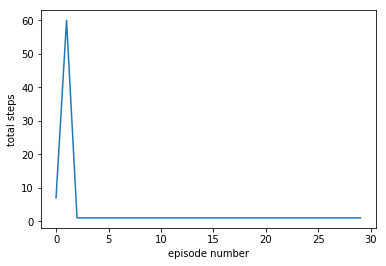

In [4]:
plt.xlabel('episode number')
plt.ylabel('total steps')
plt.plot(results)

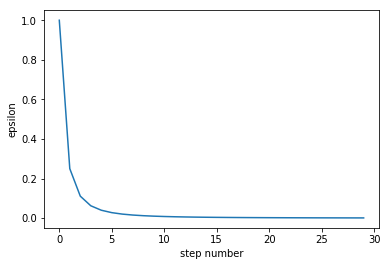

In [5]:
plt.xlabel('step number')
plt.ylabel('epsilon')
plt.plot(exploration_factor)

In [6]:
a = []
for m in my_memory:
    if m[1] not in a:
        a.append(m[1])

#for c in a:
#    print(c)
    
print(len(a))
print(a)

20
['examine Quote of the Day Calendar', 'take sandwich', 'close case', 'put Quote of the Day Calendar on counter', 'put broom on counter', 'examine sandwich', 'take broom from counter', 'eat sandwich', 'drop chocolate bar', 'drop cushion', 'examine counter', 'examine cushion', 'examine chocolate bar', 'open case', 'inventory', 'examine case', 'examine broom', 'look', 'go east', 'take lightbulb']
